In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


from astropy.io import fits
import os
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5


from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [7]:
file = 'III_159A_catalog.dat'
names = ('Star', 'Nobs', 'Smin', 'Smax', 'Smean', 'e_Smean', 'sdS', 'Wmin', 'Wmean', 
         'Date1', 'Date2', 'SName', 'RAdeg DEdeg', 's', 'Bmag', 'Vmag', 'ASCC', 'HIP')
hk = pd.read_table(file, delimiter='|', comment='#', names=names)

radec = hk['RAdeg DEdeg'].str.split(' ', expand=True).loc[:,0:1]
radec.columns = ['RA', 'Dec']
print(radec.values[261])

['010.2042' '+40.1888']


In [17]:
# i = 281 # the star w/ 77 visits in GALEX (HD 4174, symbiotic M giant)

i = 261 # 74 visits (HD 3765)

d = SkyCoord.from_name("TYC 3162-665-1")
print(d)



<SkyCoord (ICRS): (ra, dec) in deg
    ( 301.5644042,  44.4568361)>


In [33]:
len(radec)
starList = []
ra1 = 301.5644
dec1 = 44.4568

for x in range (0,len(radec)-1):
    target = hk['Star'][x]
    print(target)
#     d = SkyCoord.from_name(target)  
#     print(d)
#     ra = float(radec['RA'][x][1:])
#     dec = float(radec['Dec'][x][1:])
#     if (ra == ra1 and dec == dec1):
#         print(target)
#     print(str(ra) + ", " + str(dec))
#     if (target != hk['Star'][x-1]):
#         starList.append( str(target) + ", " + str("%.6f" %ra) + ", " + str("%.6f" %dec) + ", " + 
#                         str("%.6f" %d.ra.degree) + ", " + str("%.6f" %d.dec.degree)) 
#         starList[[0][0]].append(str("%.6f" %ra))
#         starList[[0][1]].append(str("%.6f" %rec))
#         starList[[1][0]].append(str("%.6f" %d.ra.degree))
#         starList[[1][1]].append(str(str("%.6f" %d.dec.degree))
                 
#         starList[[0][1]].append(str("%.6f" %d.ra.degree) + ", " + str("%.6f" %d.dec.degree) )
# for y in range (0, len(starList)):
#     print(starList[y])



 +58 1199 
 +51 1696 
 +44 2051 
 +32 0719 
 +01 0306 
 +01 0306 
 +00 0873 
Coma   53 
Coma   58 
Coma   65 
Coma   76 
Coma   85 
Coma   86 
Coma   90 
Coma   92 
Coma   97 
Coma  102 
Coma  111 
Coma  114 
Coma  118 
Coma  132 
Coma  150 
Gl    685 
Gl    702B
Hya     1 
Hya     1 
Hya     2 
Hya     2 
Hya     3 
Hya     4 
Hya     5 
Hya     6 
Hya     7 
Hya     8 
Hya     9 
Hya    10 
Hya    10 
Hya    11 
Hya    13 
Hya    15 
Hya    15 
Hya    16 
Hya    17 
Hya    17 
Hya    18 
Hya    18 
Hya    19 
Hya    20 
Hya    21 
Hya    21 
Hya    21 
Hya    22 
Hya    22 
Hya    23 
Hya    24 
Hya    25 
Hya    26 
Hya    27 
Hya    27 
Hya    28 
Hya    29 
Hya    29 
Hya    31 
Hya    31 
Hya    32 
Hya    33 
Hya    35 
Hya    35 
Hya    36 
Hya    36 
Hya    37 
Hya    37 
Hya    38 
Hya    41 
Hya    42 
Hya    42 
Hya    43 
Hya    44 
Hya    46 
Hya    47 
Hya    48 
Hya    48 
Hya    49 
Hya    49 
Hya    50 
Hya    50 
Hya    51 
Hya    51 
Hya    52 
Hya    52 
Hya    57 

In [27]:
# target = hk['Star'][i]
# ra = float(radec['RA'][i][1:])
# print(ra)
# dec = float(radec['Dec'][i][1:])
# print(dec)


# Boyajian's Star
# ra = 301.5644042
# dec = 44.4568361

# coordinates that I found
# ra = 10.2920
# dec = 40.2025


# found using isrc data, extremely close to what I found
# ra = 10.20528789
# dec = 40.18717517

# new coordinates with procession calculated
# ra = 10.25784158
# dec = 40.20826933


step_size = 10. # the time resolution
img_step_size = 30.
img_size = [0.1, 0.1]
phot_rad = 0.0045
# phot_rad = 0.01
ap_in = 0.0050 #changed from .005
ap_out = 0.0060 #changed from .006
# ap_in = 0.015
# ap_out = 0.02



# img_step_size = 30.
#screen saver

# print(target)

10.2042
40.1888


In [14]:
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)
k = 0;
timeArray = []
for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        
        timeArray.append((tstart, tstop))
#         print(tstart, tstop, tstop-tstart)
        print(timeArray[k][0],timeArray[k][1],timeArray[k][1]-timeArray[k][0])
#         k = k + 1
#         print(len(timeArray))
#         if k == 5:
#             break
        
            

NUV: 114007.0s (raw) in 74 exposures.
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.995 749647397.995 568.0
749646829.

In [15]:
(exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.)

array([  0.00000000e+00,   1.53729072e-04,   2.96193239e-02,
         3.93947663e+00,   3.94997898e+00,   3.95054167e+00,
         3.96629845e+00,   4.89341175e+00,   4.89359938e+00,
         4.94499623e+00,   4.94555600e+00,   5.05098246e+00,
         5.05285724e+00,   5.87150273e+00,   5.87431608e+00,
         5.87713080e+00,   5.87976344e+00,   5.88275704e+00,
         5.88538280e+00,   5.88819676e+00,   5.89063391e+00,
         5.89363527e+00,   5.89625993e+00,   5.89907369e+00,
         5.90169838e+00,   5.90488730e+00,   5.90713699e+00,
         5.91013867e+00,   5.91276351e+00,   5.98892095e+00,
         5.99173557e+00,   5.99436111e+00,   5.99698751e+00,
         5.99961396e+00,   6.00242881e+00,   6.00599248e+00,
         6.00880720e+00,   6.01143274e+00,   6.01405971e+00,
         6.01668582e+00,   6.01949937e+00,   6.02212443e+00,
         6.02737595e+00,   6.03018921e+00,   6.03281485e+00,
         6.03544127e+00,   6.03919140e+00,   6.04181710e+00,
         6.10954338e+00,

In [16]:
step_size = 100 # seconds

flux = np.zeros(len(exp_data['NUV']['t0']))

aVar = True
counter = 0

currentTime = str(datetime.datetime.now())
currentTime = currentTime.split(" ")
currentTime = currentTime[1].split(":")
currentTime = str(currentTime[0])+":"+str(currentTime[1])

currentDate = str(datetime.date.today()) + "_" + str(counter)
while(aVar):
    if not os.path.exists(currentDate):
        os.makedirs(currentDate)
        os.makedirs(currentDate + "/ds9_Images")
        os.makedirs(currentDate + "/data")
#         os.makedirs(currentDate + "/Lightcurves")
        aVar = False
    else:
        counter = counter + 1 
        currentDate = str(datetime.date.today()) + "_" + str(counter)
        avar = True

print(datetime.datetime.now())
for k in range(len(exp_data['NUV']['t0'])):
    photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius= phot_rad,
                              annulus=[ap_in, ap_out], verbose=3, csvfile=currentDate+"/data/"+target+ '_' +str(k)+"_lc.csv",
                              trange=[int(exp_data['NUV']['t0'][k]), int(exp_data['NUV']['t1'][k])+1], 
                              overwrite=True)
    data = read_lc(currentDate+'/data/'+target+ '_' +str(k)+"_lc.csv")
    flux[k] = np.median(data['flux_bgsub'])
    print(datetime.datetime.now(), k)
    
    
    


2017-05-17 15:58:43.767001
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.2042, 40.1888]
 tranges: [749646829, 749647398]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: 2017-05-17_1/data/HD   3765 _0_lc.csv
 verbose: 3
2017-05-17 15:59:20.446421 0                                ]                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.2042, 40.1888]
 tranges: [749651677, 749653316]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  100
 csvfile: 2017-05-17_1/data/HD   3765 _1_lc.csv
 verbose: 3
2017-05-17 16:01:55.838455 1                                ]                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [10.2042, 40.1888]
 tranges: [750580904, 750582296]
 radius:  0.0045
 an

[  2.37490474e-14   2.38904348e-14   2.41314760e-14   2.10059958e-14
   1.86747938e-14   2.02035116e-14   1.78408950e-14   1.96048522e-14
   1.99534796e-14   1.90044864e-14   1.80352862e-14   1.76297969e-14
   1.48115645e-14   1.15375875e-14   1.69050629e-14   1.23027636e-14
   1.66131720e-14   1.73023429e-14   1.72613619e-14   1.45789524e-14
   1.60427161e-14   1.32470055e-14   1.07907731e-14   1.59686918e-14
   1.54052531e-14   1.40310797e-14   1.26424866e-14   1.64634327e-14
   1.67385615e-14   1.72221534e-14   1.32537171e-14   1.65132078e-14
   1.16131704e-14   1.31262640e-14   1.55922686e-14   1.08276732e-14
   1.30375982e-14   1.23672617e-14   2.00447147e-14   9.33690055e-15
   1.39052112e-14   1.14161341e-14   1.08228023e-14   1.95181679e-14
   1.08517805e-14   1.94123824e-14   1.33473693e-14   1.48956271e-14
   1.13691840e-14   1.83129459e-14   1.27584170e-14   1.93869777e-14
   1.17911779e-14   1.50094709e-14   1.08211139e-14   1.92952397e-14
   1.32639885e-14   1.13804116e-14

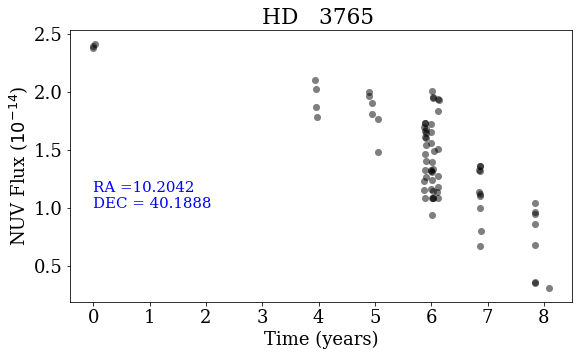

In [17]:
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (0, 1), size = "small", color = 'b')
plt.title(target)

plt.savefig(currentDate+'/'+target+'_.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
plt.savefig("Plots/"+currentDate+"_"+currentTime+"_"+target+'_.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
print(flux)


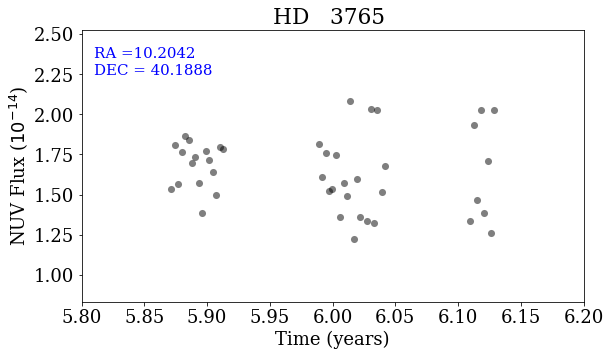

In [176]:
#let's explore just around year 6, big scatter
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.xlim(5.80,6.2)
plt.title(target)
plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (5.81, 2.25), size = "small", color = 'b')

# plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [ ]:
exp_data['NUV']['t0'][0]

In [11]:
# lets see if the mean flux for each visit is available? (doubt it...)
# would eliminate need for gAperature step for quick-look evolution!
# exp_data2 = gFind(band="both", skypos=[ra, dec])

In [12]:
# exp_data2
# NOPE....

In [26]:

# for k in range(0,len(timeArray)):  
# for k in range(0,1):  
w = str(0)
#     w = str(k)
gMap(band= "NUV", skypos=[ra, dec], stepsz=10 , skyrange=[0.010, 0.010],
         cntfile= currentDate+"/ds9_Images/"+"Boyajian_Start_visitNumber_"+w+".fits",
         trange=[1496252010, 1496252010])
#     trange=[timeArray[k][0], timeArray[k][1]]
#   values I found 10.2920hours, 40.2025degrees
#   test with 10.20528789,  40.18717517
#   old skypos=[10.3042, 40.1888]
#   gMap uses degrees for image size
#     if (k ==3):
#         break



UnboundLocalError: local variable 'mv' referenced before assignment

In [ ]:

# gPhoton.gAperture(band='NUV', skypos=[176.91975, 0.25561], stepsz=10.,
#       csvfile='gj_3685a_lc.csv', radius=0.012, annulus=[0.013,0.016],
#       trange=[766525335.,766526573.])

In [ ]:

# gPhoton.gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size,
#       csvfile='gj_3685a_lc.csv', radius=phot_rad, annulus=[ap_in,ap_out],
#       trange=[766525335.,766526573.])


In [ ]:
gMap(band='NUV', skypos=[10.3042, 40.1888], skyrange=[0.033, 0.033], cntfile="helix_fuv.fits" )


In [ ]:
exp_data['NUV']

In [8]:

gMap(band= "NUV", skypos=[10.3042, 40.1888], stepsz=100 , skyrange=[0.05, 0.05],
             cntfile= "gj_3765test93_count_movie.fits", trange=[749646829, 749647398])